In [17]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('polovni automobili jupiter.csv')

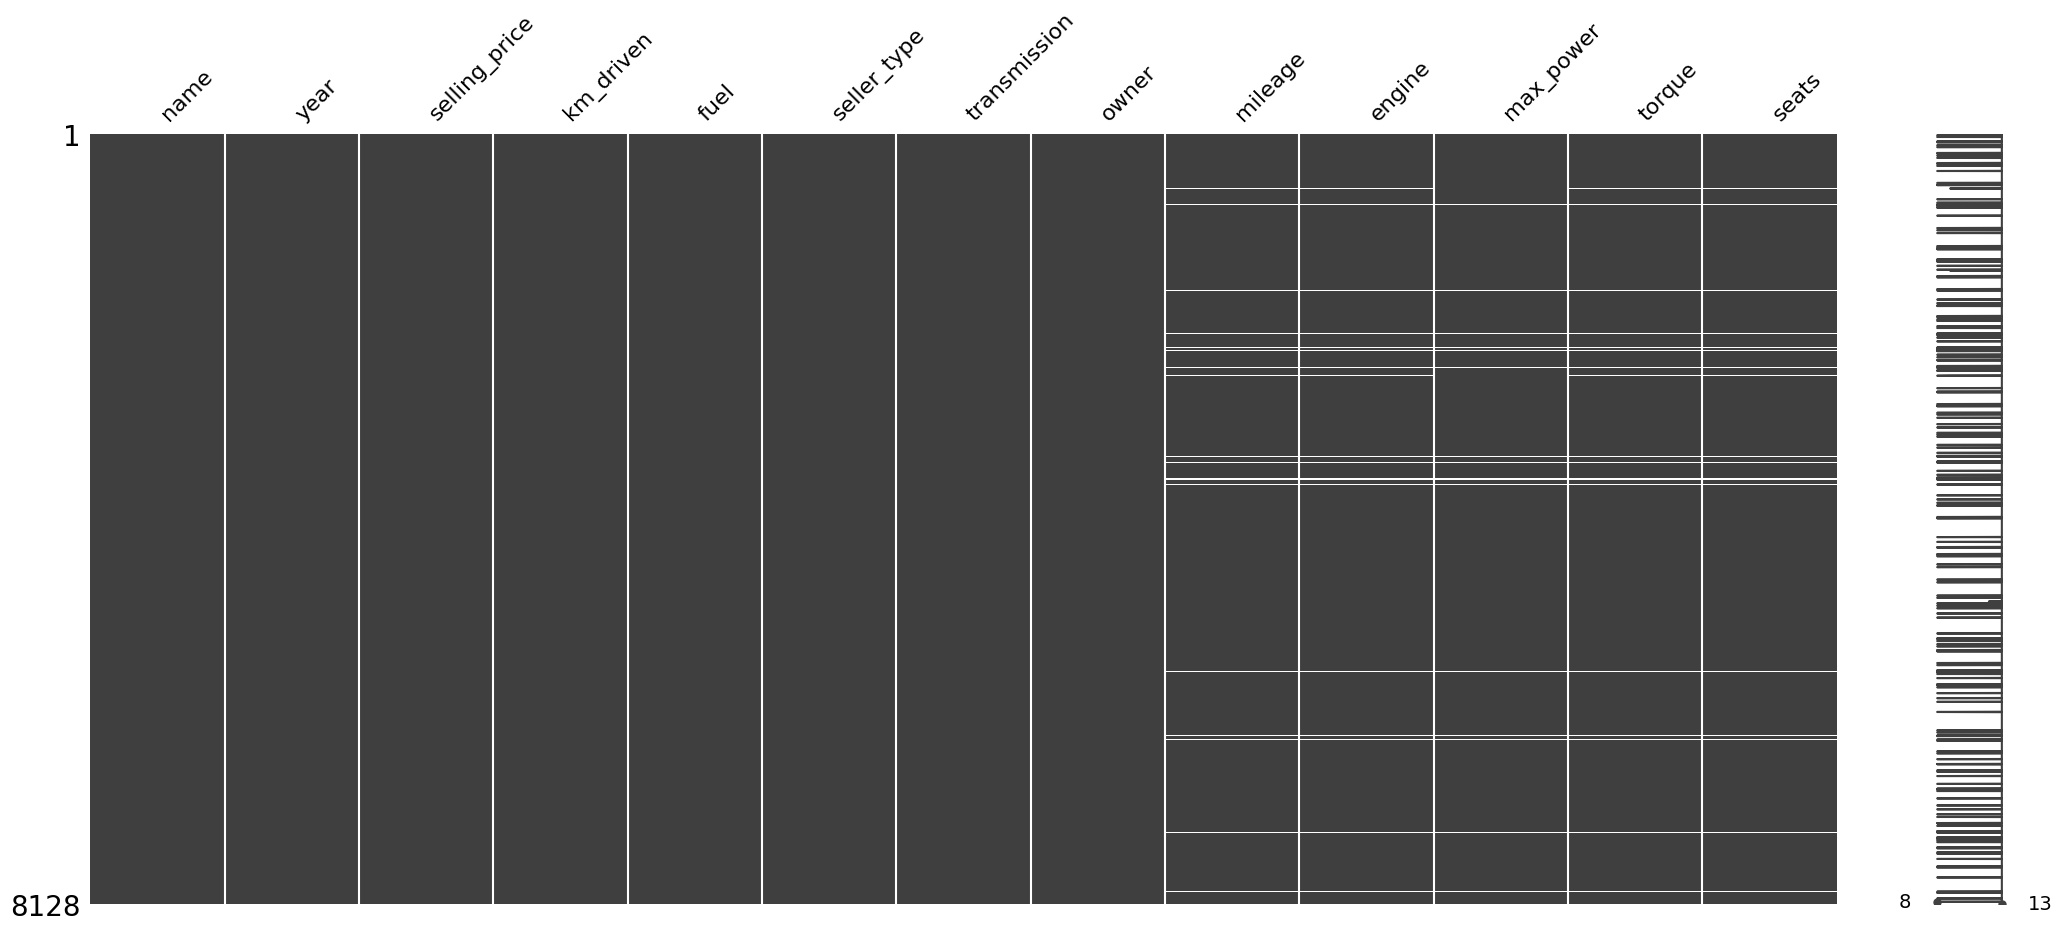

In [19]:
msno.matrix(df)
plt.show()

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [21]:
# u novoj verziji pandasa mora ovo n=1 da se napise da je n broj mesta gde ce se postaviti razmak
df[['car', 'model']] = df['name'].str.split(' ', n=1, expand=True)

In [22]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai,i20 Magna
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,Verna CRDi SX
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire ZDi
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Tata,Indigo CR4


In [23]:
df.drop(columns=['name'], inplace=True)

In [26]:
# RAZDVAJANJE KOLONE TORQUE NA DVE KOLONE
def split_torque(torque_str):
    if pd.isna(torque_str):
        return pd.NA, pd.NA
    
    parts = torque_str.split('@')
    value = parts[0].strip() if len(parts) > 0 else pd.NA
    rpm = parts[1].strip() if len(parts) > 1 else pd.NA

    return value, rpm


df[['Torque Value', 'Torque RPM']] = df['torque'].apply(lambda x: split_torque(x)).tolist()


df[['torque', 'Torque Value', 'Torque RPM']].head()


,torque,Torque Value,Torque RPM
0,190Nm@ 2000rpm,190Nm,2000rpm
1,250Nm@ 1500-2500rpm,250Nm,1500-2500rpm
2,"12.7@ 2,700(kgm@ rpm)",12.7,"2,700(kgm"
3,22.4 kgm at 1750-2750rpm,22.4 kgm at 1750-2750rpm,<NA>
4,"11.5@ 4,500(kgm@ rpm)",11.5,"4,500(kgm"


In [28]:
df.drop(columns=['torque'], inplace=True)


In [29]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car,model,Torque Value,Torque RPM
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti,Swift Dzire VDI,190Nm,2000rpm
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda,Rapid 1.5 TDI Ambition,250Nm,1500-2500rpm
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda,City 2017-2020 EXi,12.7,"2,700(kgm"
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai,i20 Sportz Diesel,22.4 kgm at 1750-2750rpm,<NA>
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti,Swift VXI BSIII,11.5,"4,500(kgm"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20 Magna,113.7Nm,4000rpm
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,Hyundai,Verna CRDi SX,24,"1,900-2,750(kgm"
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,Maruti,Swift Dzire ZDi,190Nm,2000rpm
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,Tata,Indigo CR4,140Nm,1800-3000rpm


In [30]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'car', 'model', 'Torque Value', 'Torque RPM'],
      dtype='object')

In [35]:
newdf = ['Car', 'Model'] + [col for col in df.columns if col not in ['Car', 'Model', 'name']]

In [36]:
df.to_csv('usednew.csv', index=False)

In [37]:
df2=pd.read_csv('usednew.csv')